## uber-raw-data.csv files

In [10]:
import pandas as pd
import matplotlib  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [11]:
april_data = pd.read_csv("uber-raw-data-apr14.csv", nrows=500000)

june = pd.read_csv("uber-raw-data-jun14.csv", nrows=500000)
july = pd.read_csv("uber-raw-data-jul14.csv", nrows=500000)
august = pd.read_csv("uber-raw-data-aug14.csv", nrows=500000)
september = pd.read_csv("uber-raw-data-sep14.csv", nrows=500000)

In [12]:
april_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [13]:
april_data.info()
april_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
Date/Time    500000 non-null object
Lat          500000 non-null float64
Lon          500000 non-null float64
Base         500000 non-null object
dtypes: float64(2), object(2)
memory usage: 15.3+ MB


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [14]:
lon = april_data['Lon']
lon.shape

(500000,)

In [15]:
april_data.isnull().values.any() ## Check for NaN's or missing rows

False

In [16]:
lat = april_data['Lat']

aug_latLong = august.iloc[:, 1:3]
june_latLong = june.iloc[:, 1:3]
july_latLong = july.iloc[:, 1:3]
sep_latLong = september.iloc[:, 1:3]

In [17]:
latLong = april_data.iloc[:, 1:3]

In [18]:
latLong.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


### plotted activity during april

In [19]:
plt.show(block=True)
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (13, 10) #Size of figure  
rcParams['figure.dpi'] = 100

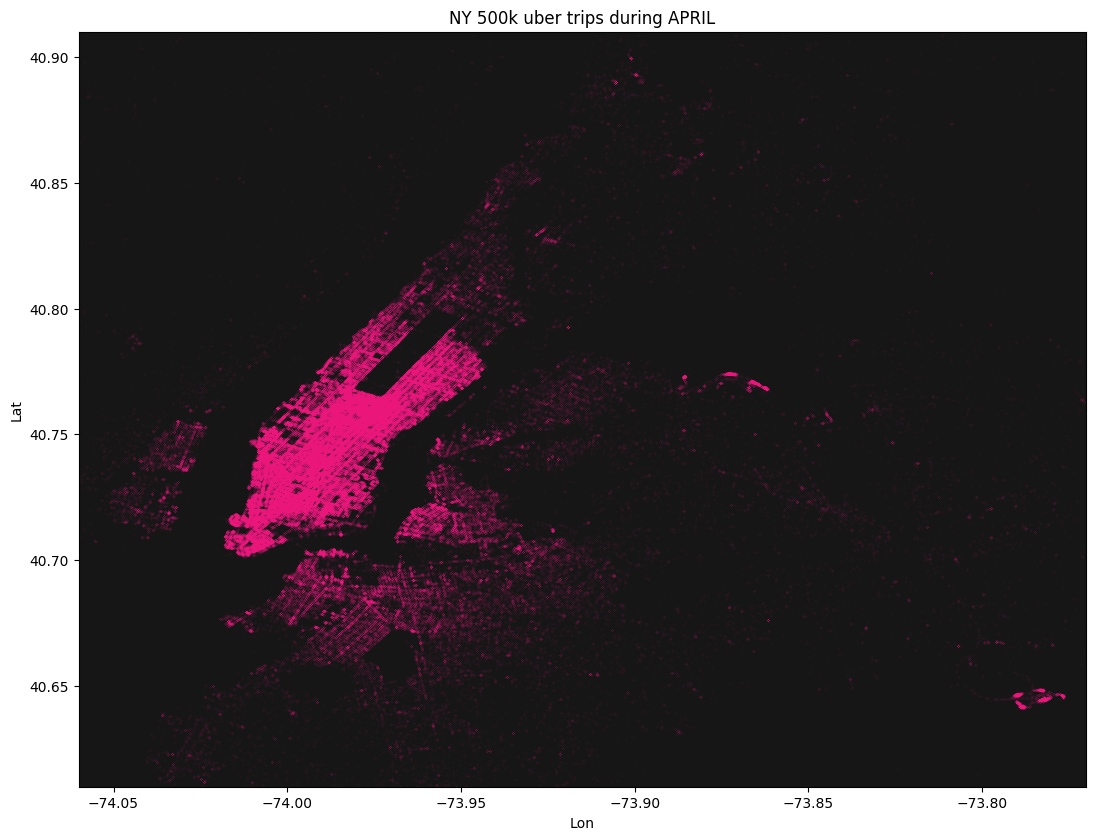

In [20]:

uber_plot_apr = latLong.plot(kind='scatter', x='Lon', y='Lat',color='#ff1d8e',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.001)
#uber_plot_apr=laatLong.plot(kind='scatter', x='Lon', y='Lat',color='#39FF14',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.01,alpha=.6)
plt.title('NY 500k uber trips during APRIL')
uber_plot_apr.set_facecolor('#161616') 


### Plotting activity each month (not useful, diffs not apparent)

Text(0.5,1,'SEPTEMBER 500k trips')

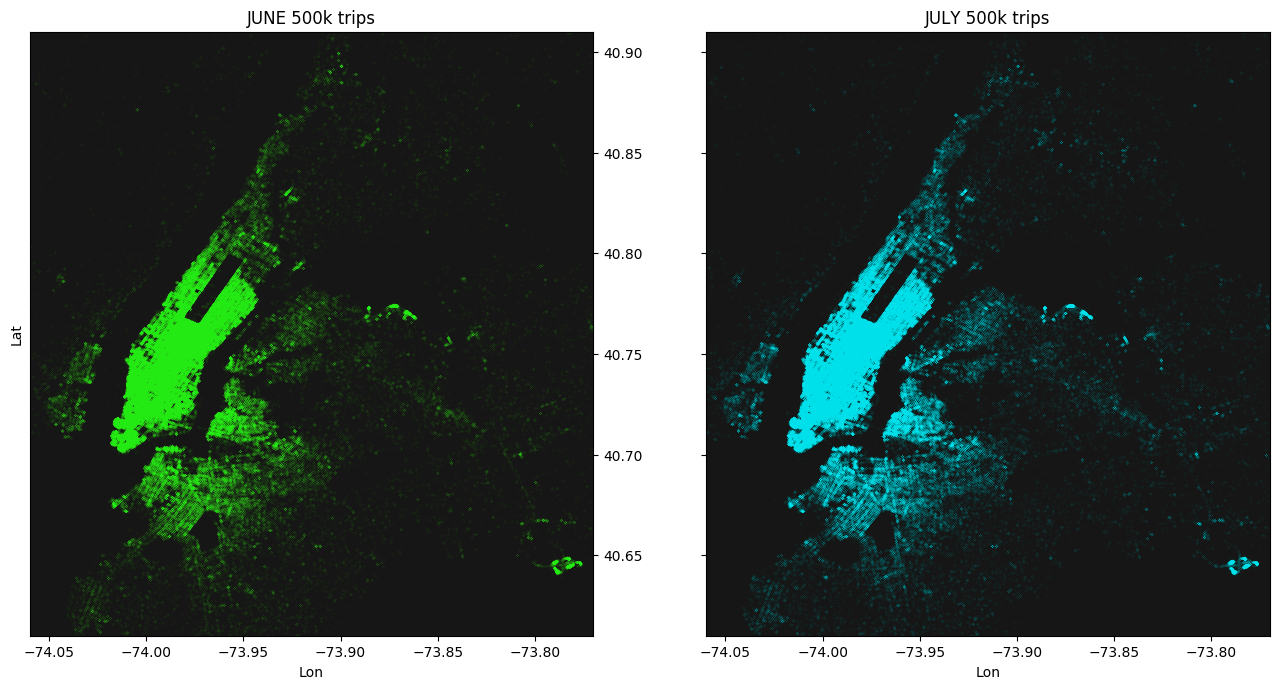

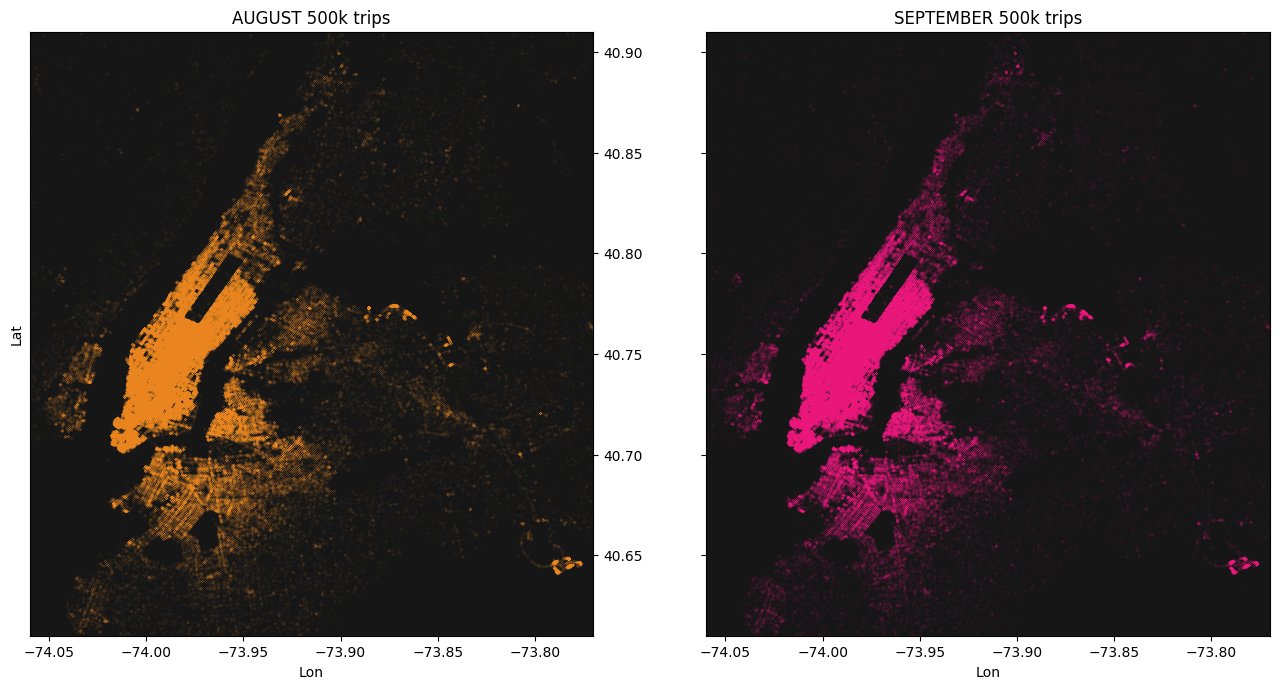

In [21]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(16,8), sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

june_latLong.plot(kind='scatter', x='Lon', y='Lat',color='#39FF14',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.001, ax=ax).set_facecolor('#161616')
ax.set_title("JUNE 500k trips")
july_latLong.plot(kind='scatter', x='Lon', y='Lat',color='#00F5FF',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.001, ax=ax2).set_facecolor('#161616')
ax2.set_title("JULY 500k trips")

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(16,8), sharey=True)

ax3.invert_xaxis()
ax3.yaxis.tick_right()

aug_latLong.plot(kind='scatter', x='Lon', y='Lat',color='#FF9933',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.001, ax=ax3).set_facecolor('#161616')
ax3.set_title("AUGUST 500k trips")
sep_latLong.plot(kind='scatter', x='Lon', y='Lat',color='#ff1d8e',xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.001, ax=ax4).set_facecolor('#161616')
ax4.set_title("SEPTEMBER 500k trips")


### Create Hourly and Weekday cols out of Date/hour

In [22]:
#### Create slice from april data for experiments
april_slice = pd.read_csv("uber-raw-data-apr14.csv", nrows=10000)


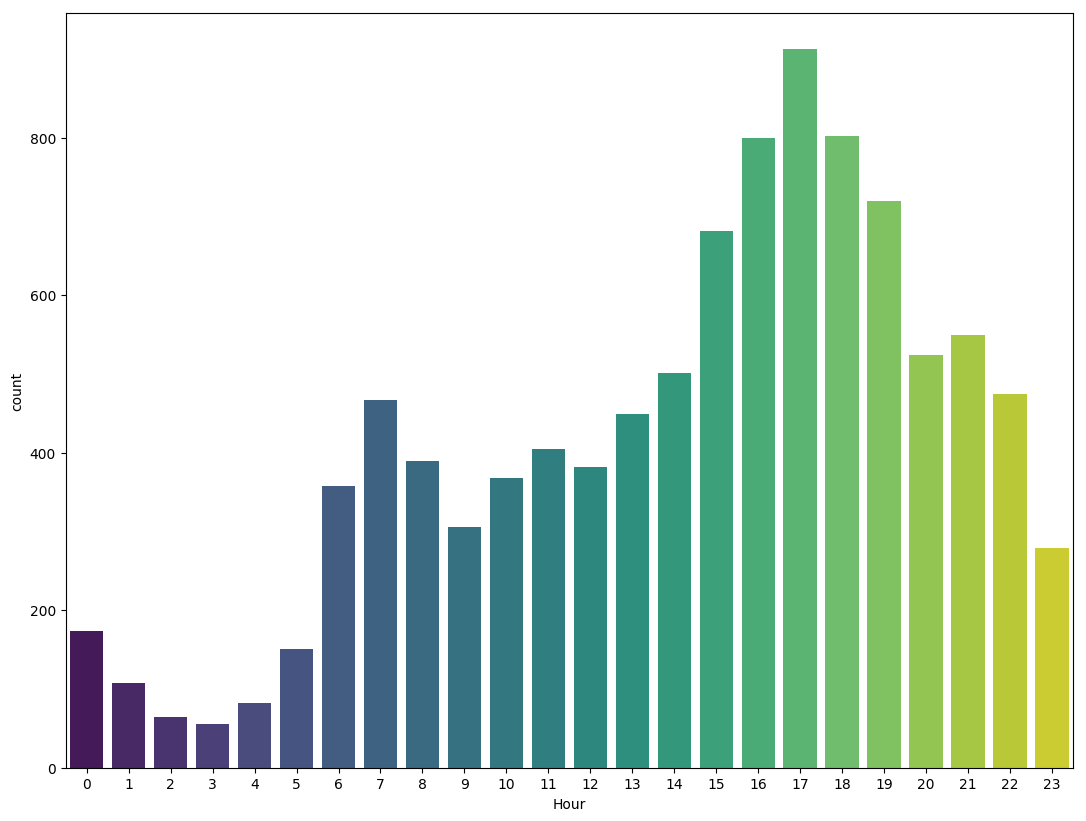

In [23]:
#convet dates from str to datetime object
april_slice['timestamp'] = pd.to_datetime(april_slice['Date/Time'])

#info by hour
april_slice['Hour'] = april_slice['timestamp'].apply(lambda time: time.hour)
sns.countplot(x='Hour', data=april_slice, palette='viridis')

In [24]:
### BASED ON WEEKDAY
dmap = {0:'MON', 1:'TUE', 2:'WED', 3:'THUR', 4:'FRI', 5:'SAT', 6:'SUN'}
april_slice['Weekday'] = april_slice['timestamp'].apply(lambda i: i.dayofweek)

#change from number code of weekday to weekday string
april_slice['Weekday'] = april_slice['Weekday'].map(dmap)

#### scatter based on weekday // high activity on mondays? not reflected in count plt

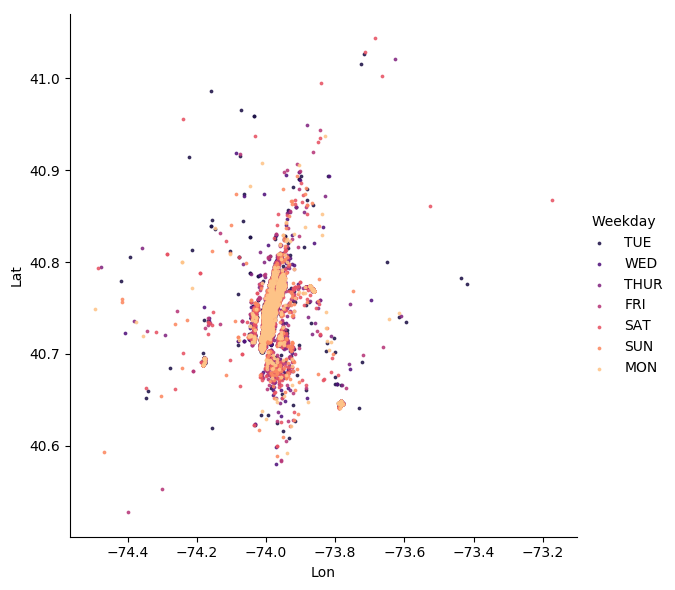

In [25]:
plt.show(block=True)
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style) 

g = sns.lmplot('Lon','Lat',data=april_slice, hue='Weekday',
           palette='magma',height=6,scatter_kws={"s": 3}, fit_reg=False)

In [26]:
## 
april_slice['Lat'].value_counts().head()

40.7741    39
40.7554    33
40.7420    31
40.7593    31
40.7644    31
Name: Lat, dtype: int64

In [27]:
april_slice['Lon'].value_counts().head()

-73.9854    36
-73.9820    34
-73.9918    34
-73.9838    32
-73.9888    30
Name: Lon, dtype: int64

In [28]:
april_slice['lat_lon'] = april_slice[['Lat', 'Lon']].apply(tuple, axis=1)

In [29]:
april_slice['lat_lon'].head()

0     (40.769, -73.9549)
1    (40.7267, -74.0345)
2    (40.7316, -73.9873)
3    (40.7588, -73.9776)
4    (40.7594, -73.9722)
Name: lat_lon, dtype: object

In [30]:
april_slice['lat_lon'].nunique()

8928

In [31]:
april_slice['lat_lon'].value_counts().head(10)

(40.7732, -73.8856)    11
(40.7685, -73.8625)    10
(40.645, -73.7819)      9
(40.771, -73.866)       8
(40.7741, -73.8726)     8
(40.6449, -73.7822)     7
(40.7741, -73.8727)     7
(40.6949, -74.1781)     6
(40.7741, -73.8723)     6
(40.742, -74.0038)      6
Name: lat_lon, dtype: int64

###### Convert (40.7732, -73.8856) to Address ->> East Elmhurst, Queens, NY, USA

### Tracking... need Pickup and Dropoff?

In [32]:
federal_taxi = pd.read_csv("Federal_02216.csv", nrows=5)

In [33]:
federal_taxi.info

<bound method DataFrame.info of          Date      Time                                  PU_Address  \
0  07/01/2014  07:15 AM  Brooklyn Museum, 200 Eastern Pkwy., BK NY;   
1  07/01/2014  07:30 AM              33 Robert Dr., Short Hills NJ;   
2  07/01/2014  08:00 AM                    60 Glenmore Ave., BK NY;   
3  07/01/2014  09:00 AM                     128 East 31 St., BK NY;   
4  07/01/2014  09:30 AM                139-39 35 Ave., Flushing NY;   

                                          DO_Address  \
0                         1 Brookdale Plaza, BK NY;    
1  John F Kennedy International Airport, vitona A...   
2                        2171 Nostrand Ave., BK NY;    
3                              369 93rd St., BK NY;    
4                               La Guardia Airport;    

                                     Routing Details  \
0  PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...   
1  PU: 33 Robert Dr., Short Hills NJ; DO: John F ...   
2  PU: 60 Glenmore Ave., BK NY; DO: 

In [34]:
federal_taxi.columns

Index(['Date', 'Time', 'PU_Address', 'DO_Address', 'Routing Details',
       'PU_Address.1', 'Status'],
      dtype='object')

In [35]:
fed_latlong = federal_taxi[['PU_Address', 'DO_Address']]

In [36]:
fed_latlong.head()

,PU_Address,DO_Address
0,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;"
1,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A..."
2,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;"
3,"128 East 31 St., BK NY;","369 93rd St., BK NY;"
4,"139-39 35 Ave., Flushing NY;",La Guardia Airport;


In [37]:
fed_latlong.columns

Index(['PU_Address', 'DO_Address'], dtype='object')

In [38]:
fed_latlong.isnull().any()

PU_Address    False
DO_Address    False
dtype: bool

In [39]:
fed_latlong.dropna(how='any')

,PU_Address,DO_Address
0,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;"
1,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A..."
2,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;"
3,"128 East 31 St., BK NY;","369 93rd St., BK NY;"
4,"139-39 35 Ave., Flushing NY;",La Guardia Airport;


In [40]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="federal_taxi_coords_from_address", timeout=None)

trip1 = fed_latlong.iloc[:1, 0:2]
trip2 = fed_latlong.iloc[2:3, 0:2]

In [41]:
##### TRIP1 COORDINATES double lambda applied to extract coords tuple
trip1['PU_coords'] = trip1["PU_Address"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
trip1['DO_coords'] = trip1["DO_Address"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

In [42]:
trip1.head()

,PU_Address,DO_Address,PU_coords,DO_coords
0,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","(40.6709108, -73.9633157304714)","(40.911215, -73.831726)"


In [43]:
##### TRIP2 COORDINATES double lambda applied to extract coords tuple
trip2['PU_coords'] = trip2["PU_Address"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
trip2['DO_coords'] = trip2["DO_Address"].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

#### CALCULATE DISTANCE BETWEEN PICKUP AND DROPOFF FOR TWO TRIPS

In [44]:
from geopy.distance import geodesic

trip_one_pickup =  trip1['PU_coords']
trip_one_dropoff = trip1['DO_coords']

trip_two_pickup =  trip2['PU_coords']
trip_two_dropoff = trip2['DO_coords']

In [45]:
distance_trip_one = geodesic(trip_one_pickup, trip_one_dropoff).miles
print(distance_trip_one)

17.960493953973607


In [46]:
distance_trip_two = geodesic(trip_two_pickup, trip_two_dropoff).miles
print(distance_trip_two)

3.3741157612605814


In [77]:
trip1["DO_coords"][0][0]

40.911215

In [47]:
import folium

In [123]:
trip1_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")
folium.CircleMarker(location=trip1["PU_coords"][0],fill=True, color='red').add_to(trip1_map)
folium.CircleMarker(location=trip1["DO_coords"][0],fill=True, color='red').add_to(trip1_map)
folium.CircleMarker(location=[40.6709313, -73.9087057],fill=True, color='blue').add_to(trip1_map)
folium.CircleMarker(location=[40.6319126, -73.9474032],fill=True, color='blue').add_to(trip1_map)

trip1_map


In [88]:
trip1["PU_coords"][0][0]
trip1["PU_coords"][0][1]

-73.9633157304714

In [126]:
trip_one_line = folium.PolyLine([
    [trip1["PU_coords"][0][0],trip1["PU_coords"][0][1]], 
    [trip1["DO_coords"][0][0],trip1["DO_coords"][0][1]]
    ]).add_to(trip1_map)

trip_two_line = folium.PolyLine([
    [40.6319126, -73.9474032],
    [40.6709313, -73.9087057]
]).add_to(trip1_map)
trip1_map

In [110]:
trip2["PU_coords"]

2    (40.6709313, -73.9087057)
Name: PU_coords, dtype: object

In [111]:
trip2["DO_coords"]

2    (40.6319126, -73.9474032)
Name: DO_coords, dtype: object